Get the required libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
from mlxtend.regressor import StackingRegressor
%matplotlib inline 

Get the data

In [2]:
successfulVends_raw = pd.read_csv("successfulVENDS2019.csv")
deposit_raw = pd.read_csv("deposit2019.csv")
loan_raw = pd.read_csv("loan2019.csv")

Rename columns for uniformity

In [3]:
deposit_raw= deposit_raw.rename(index=str,columns={"systemtranstime":"time"})

Set to datetime type

In [4]:
deposit_raw['time']=pd.to_datetime(deposit_raw.time)

Visualize the orgaccountbalance 

<Figure size 1296x864 with 0 Axes>

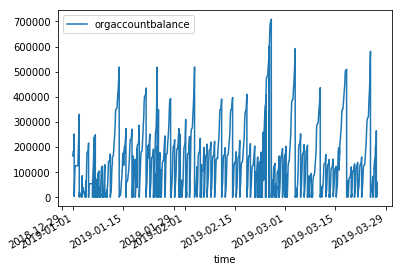

In [5]:
plt.figure(figsize=(18, 12))
deposit_raw.plot(x='time',y='orgaccountbalance')

Convert time to datetime data type

In [6]:
successfulVends_raw['time']=pd.to_datetime(successfulVends_raw.time)


In [7]:
loan_raw['time']=pd.to_datetime(loan_raw.time)

Extract time and amount


In [8]:
#Comparing with orgaccountbalance 
loan_raw = loan_raw[['time','amount']]
deposit_raw = deposit_raw[['time','transamount','orgaccountbalance']]
successfulVends_raw= successfulVends_raw[['time','amount']]

Get hourly amounts 


In [9]:
account = deposit_raw.resample('60min', on='time').sum()
vends = successfulVends_raw.resample('60min', on='time').sum()
loan = loan_raw.resample('60min', on='time').sum()

Create normalize function 

In [10]:
#Normal
def normalize(x):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(np.vstack(x))
    return x_scaled


Get all amounts in one dataset

In [11]:
both = pd.concat([vends,account], axis=1).dropna()
both['amount']=normalize(both.amount)
both['transamount']=normalize(both.transamount)
both['orgaccountbalance']=normalize(both.orgaccountbalance)

In [12]:
both.head()

,amount,transamount,orgaccountbalance
time,,,
2019-01-01 06:00:00,0.000003,0.193862,0.044202
2019-01-01 07:00:00,0.000000,0.201744,0.008331
2019-01-01 08:00:00,0.000000,0.186431,0.021966
2019-01-01 09:00:00,0.000000,0.156812,0.025304
2019-01-01 10:00:00,0.000000,0.077320,0.027722


Visualize to see any relationships

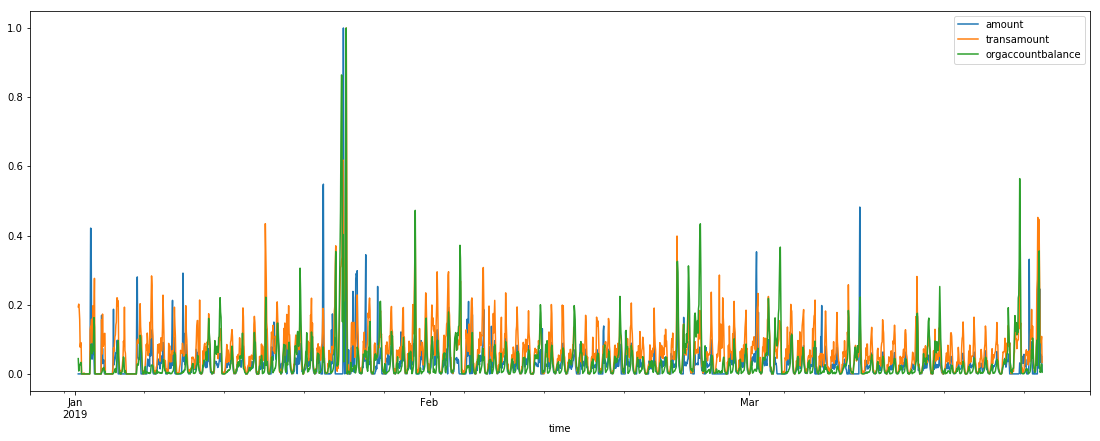

In [13]:
plt.rcParams['figure.figsize']=[19,7]
both.plot()

See one month

NameError: name 'i' is not defined

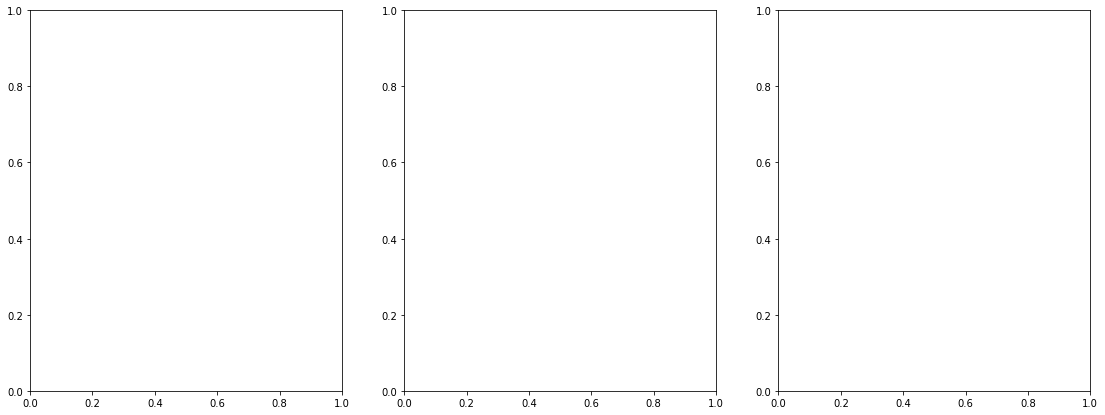

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=3)
both[both.index.month==i].plot(title="Amounts")